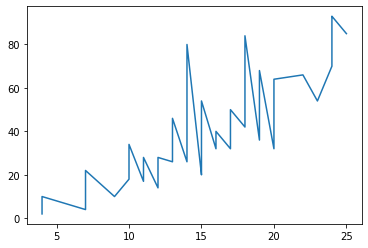

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
myData = pd.read_csv('./data/mycar.csv')
X = myData.iloc[:,:-1].values
Y = myData.iloc[:,1].values
# myData.head()
plt.plot(X, Y)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)
from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,Y_train) #обучаем модель на обучающих данных
y_pred = myModel.predict(X_test)
from sklearn import metrics 
MSE = metrics.mean_squared_error(Y_test, y_pred)
MSE

187.27041811056478

In [3]:
R_2 = metrics.r2_score(Y_test, y_pred)
R_2

0.5424791079430478

In [4]:
pred = [1, 3, 2, 5]
test = [2, 3, -1, 4]
MSE = metrics.mean_squared_error(test, pred)
R_2 = metrics.r2_score(test, pred)
[MSE, R_2]

[2.75, 0.2142857142857143]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('./data/data_flats2.csv', sep =';')
data.head()

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
id                                       30469 non-null int64
full_sq                                  30469 non-null int64
life_sq                                  24086 non-null float64
floor                                    30302 non-null float64
preschool_education_centers_raion        30469 non-null int64
school_education_centers_raion           30469 non-null int64
school_education_centers_top_20_raion    30469 non-null int64
university_top_20_raion                  30469 non-null int64
sport_objects_raion                      30469 non-null int64
additional_education_raion               30469 non-null int64
culture_objects_top_25_raion             30469 non-null int64
shopping_centers_raion                   30469 non-null int64
metro_km_walk                            30444 non-null float64
kindergarten_km                          30469 non-null float64
school_km      

In [ ]:
data.isnull().sum()

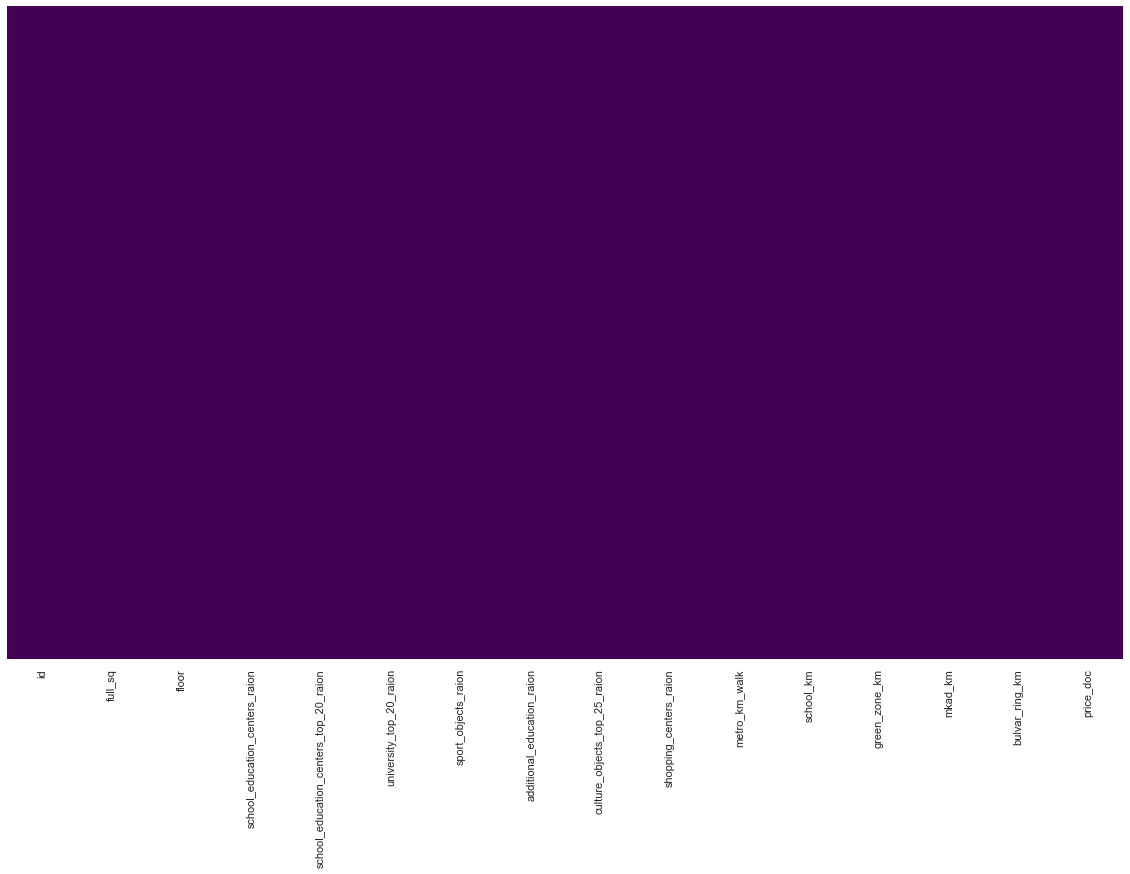

In [124]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

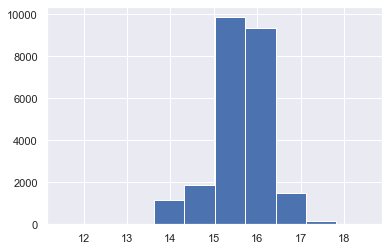

In [125]:
data.price_doc.hist()

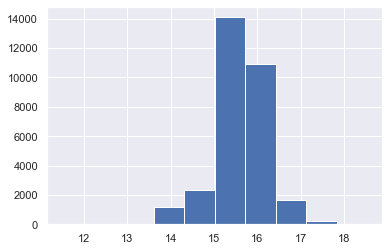

In [64]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

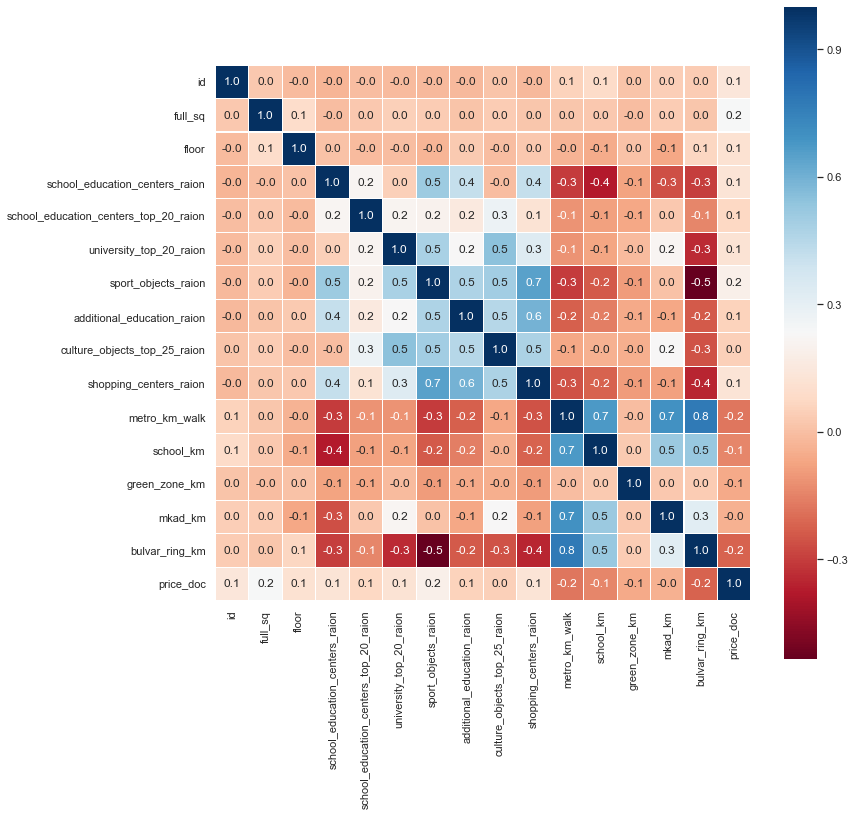

In [126]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [127]:
data.dropna(inplace=True)
data.drop(["life_sq", "kindergarten_km", "park_km", "kremlin_km", "preschool_education_centers_raion"], axis=1, inplace=True)

KeyError: "['life_sq' 'kindergarten_km' 'park_km' 'kremlin_km'\n 'preschool_education_centers_raion'] not found in axis"

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23925 entries, 0 to 30468
Data columns (total 16 columns):
id                                       23925 non-null int64
full_sq                                  23925 non-null int64
floor                                    23925 non-null float64
school_education_centers_raion           23925 non-null int64
school_education_centers_top_20_raion    23925 non-null int64
university_top_20_raion                  23925 non-null int64
sport_objects_raion                      23925 non-null int64
additional_education_raion               23925 non-null int64
culture_objects_top_25_raion             23925 non-null int64
shopping_centers_raion                   23925 non-null int64
metro_km_walk                            23925 non-null float64
school_km                                23925 non-null float64
green_zone_km                            23925 non-null float64
mkad_km                                  23925 non-null float64
bulvar_ring_k

In [129]:
from sklearn.model_selection import train_test_split
# X = data.loc[:, (data.columns != 'price_doc') and (data.columns != 'id')]
# X = data[['full_sq', 'floor',]]
X = data.loc[:, ~data.columns.isin(['price_doc','id'])]
Y = data.price_doc
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23925 entries, 0 to 30468
Data columns (total 14 columns):
full_sq                                  23925 non-null int64
floor                                    23925 non-null float64
school_education_centers_raion           23925 non-null int64
school_education_centers_top_20_raion    23925 non-null int64
university_top_20_raion                  23925 non-null int64
sport_objects_raion                      23925 non-null int64
additional_education_raion               23925 non-null int64
culture_objects_top_25_raion             23925 non-null int64
shopping_centers_raion                   23925 non-null int64
metro_km_walk                            23925 non-null float64
school_km                                23925 non-null float64
green_zone_km                            23925 non-null float64
mkad_km                                  23925 non-null float64
bulvar_ring_km                           23925 non-null float64
dtypes: flo

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=77)
X_train.head()

,full_sq,floor,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,metro_km_walk,school_km,green_zone_km,mkad_km,bulvar_ring_km
16898,37,9.0,7,0,0,5,1,0,0,0.871529,0.307468,0.443612,5.865391,7.695170
16312,37,7.0,5,0,0,4,3,0,5,0.731977,0.543898,0.025472,2.929544,16.916736
22697,45,5.0,7,0,0,13,0,0,2,0.211635,0.331990,0.184985,3.457291,8.688005
2062,44,5.0,6,0,0,7,3,0,0,1.303747,0.787347,0.509152,3.548399,9.287417
12203,45,2.0,3,0,0,6,2,0,3,1.275846,0.428117,0.221515,2.439340,12.138804


In [143]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

scaler = RobustScaler()
X_test = scaler.fit_transform(X_test)
# X_test = scaler.transform(X_test)
[X_train, Y_train]
# round(scaler.fit_transform(data).min(),5)

[array([[-0.375     ,  0.42857143,  0.66666667, ...,  0.71605622,
          0.17814931, -0.54708286],
        [-0.375     ,  0.14285714,  0.        , ..., -0.67444818,
         -0.34889011,  0.56786664],
        [-0.04166667, -0.14285714,  0.66666667, ..., -0.14399816,
         -0.25414965, -0.42704249],
        ...,
        [-0.08333333, -0.42857143, -0.33333333, ..., -0.75915568,
         -0.81332533,  0.24183059],
        [ 2.125     , -0.28571429,  1.        , ..., -0.28587439,
         -0.25342795, -0.27890178],
        [-0.625     , -0.14285714,  1.33333333, ...,  1.00217773,
          0.29576398, -0.65708825]]), 16898    15.894952
 16312    15.555977
 22697    15.687313
 2062     14.914123
 12203    15.894952
 11609    15.501910
 21739    15.761421
 28992    14.220976
 8376     15.501910
 16153    15.747032
 1370     15.687313
 4909     15.520259
 28825    15.717469
 16105    16.222456
 4227     15.424949
 26201    15.769141
 11936    15.706363
 12228    14.508658
 10548    16.3

In [150]:
from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,Y_train) #обучаем модель на обучающих данных
y_pred = myModel.predict(X_test)
from sklearn import metrics 
MSE = metrics.mean_squared_error(np.exp(Y_test) - 1, np.round(np.exp(y_pred) - 1))
round(MSE, 2)

# 
# type(Y_test)
# [Y_test.]
# Y_test = Y_test.to_numpy()
# [X_test, y_pred, Y_test]

18961517474146.29

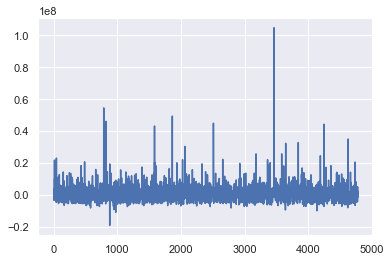

In [158]:
plt.plot(range(0,y_pred.size), (np.exp(Y_test) - 1) - np.round(np.exp(y_pred) - 1))

In [141]:
from sklearn import metrics 
MSE = metrics.mean_squared_error(np.exp(Y_test) - 1, np.round(np.exp(y_pred) - 1))
round(MSE, 2)

18974124024711.16

In [148]:
y_pred = myModel.predict(X_train)
from sklearn import metrics 
MSE = metrics.mean_squared_error(np.exp(Y_train) - 1, np.round(np.exp(y_pred) - 1))
round(MSE, 2)

1.8028085989839972e+23